In [135]:
import pandas
import configparser
import psycopg2

In [136]:
config = configparser.ConfigParser()
config.read('config.ini')

host=config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd=config['myaws']['pwd']

In [137]:
conn = psycopg2.connect(host=host,
                       user=user,
                       password=pwd,
                       dbname=db)

In [138]:
sql = "select * from student"

In [139]:
df = pandas.read_sql_query(sql,conn)

df[:]

,s_email,s_name,major
0,s1@jmu.edu,s1,IA
1,s2@jmu.edu,s2,IA
2,s3@jmu.edu,s3,ISAT
3,s4@jmu.edu,s4,ISAT
4,s5@jmu.edu,s5,GS


In [140]:
sql = """
    select professor.p_name,course.c_name
    from professor
    inner join course
    on professor.p_email = course.p_email

""" 

In [141]:
df = pandas.read_sql_query(sql,conn)

df[:]

,p_name,c_name
0,p2,postgresql
1,p2,twitter
2,p4,linedin
3,p4,mongodb


In [142]:
sql = """
select count(*) as num_stu, c_number
from enroll
group by c_number

"""

<AxesSubplot:xlabel='c_number'>

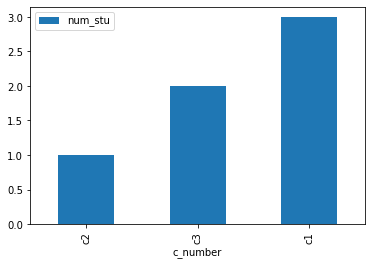

In [143]:
df = pandas.read_sql_query(sql,conn)

df.plot.bar(x='c_number',y='num_stu')

In [144]:
sql = """
    select professor.p_name,count(*) as num_course
    from professor
    inner join course
    on professor.p_email = course.p_email
    group by professor.p_name

""" 

<AxesSubplot:xlabel='p_name'>

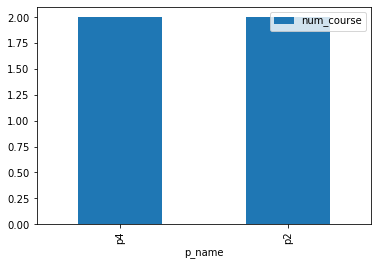

In [145]:
df = pandas.read_sql_query(sql,conn)

df.plot.bar(x= 'p_name',y='num_course')

In [146]:
sql = """
    insert into student(s_email,s_name,major)
    values('{}','{}','{}')
    """.format('s5@jmu.edu','s5','GS')

print(sql)


    insert into student(s_email,s_name,major)
    values('s5@jmu.edu','s5','GS')
    


In [147]:

cur=conn.cursor()

In [148]:
cur.execute(sql)

UniqueViolation: duplicate key value violates unique constraint "student_pkey"
DETAIL:  Key (s_email)=(s5@jmu.edu) already exists.


In [149]:
conn.commit()

In [150]:
df = pandas.read_sql_query('select * from student',conn)

df[:]

,s_email,s_name,major
0,s1@jmu.edu,s1,IA
1,s2@jmu.edu,s2,IA
2,s3@jmu.edu,s3,ISAT
3,s4@jmu.edu,s4,ISAT
4,s5@jmu.edu,s5,GS


In [181]:

conn.rollback()

In [178]:
sql = """
    insert into professor (p_email,p_name,office)
    values( '{}','{}','{}')
""".format('p4@jmu.edu','p4','o4')

In [179]:

cur.execute(sql)

UniqueViolation: duplicate key value violates unique constraint "professor_pkey"
DETAIL:  Key (p_email)=(p4@jmu.edu) already exists.


In [176]:
conn.commit()

In [182]:
df = pandas.read_sql_query('select * from professor',conn)
df[:]

,p_email,p_name,office
0,p1@jmu.edu,p2,o1
1,p4@jmu.edu,p4,o4


In [169]:
sql = """
    insert into course (p_email,c_number,c_name,room)
    values( '{}','{}','{}','{}')
""".format('p4@jmu.edu','c5','linkedin','r2')

In [170]:
cur.execute(sql)

UniqueViolation: duplicate key value violates unique constraint "course_pkey"
DETAIL:  Key (c_number)=(c5) already exists.


In [171]:
conn.commit()

In [172]:
df = pandas.read_sql_query('select * from course',conn)
df[:]

,c_number,c_name,room,p_email
0,c1,postgresql,r1,p1@jmu.edu
1,c3,twitter,r1,p1@jmu.edu
2,c5,linedin,r2,p4@jmu.edu
3,c2,mongodb,r2,p4@jmu.edu


In [167]:
sql = """
    update course
    set p_email ='{}'
    where p_email ='{}'
""".format('p4@jmu.edu','p2@jmu.edu')

In [161]:
cur.execute(sql)

In [162]:
conn.commit()

In [129]:
df = pandas.read_sql_query('select * from course',conn)
df[:]

,c_number,c_name,room,p_email
0,c1,postgresql,r1,p1@jmu.edu
1,c3,twitter,r1,p1@jmu.edu
2,c5,linedin,r2,p4@jmu.edu
3,c2,mongodb,r2,p4@jmu.edu


In [130]:
sql = """
delete from professor
where p_email='{}'
""".format('p2@jmu.edu')

In [131]:
cur.execute(sql)

In [97]:
conn.commit()

In [98]:
df = pandas.read_sql_query('select * from professor',conn)
df[:]

,p_email,p_name,office
0,p1@jmu.edu,p2,o1
1,p4@jmu.edu,p4,o4


In [183]:
cur.close()
conn.close()